In [119]:
#importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [120]:
#carga de datos
url_ads = 'https://raw.githubusercontent.com/javilledo/python-ml-course/master/datasets/ads/Advertising.csv'
data_ads_original = pd.read_csv(url_ads)
data_ads = pd.read_csv(url_ads)

In [121]:
data_ads_original.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [122]:
len(data_ads)

200

In [123]:
#se añade una columna con el numerador de la correlación entre TV y Ventas
data_ads['corr_TV_Sales'] = ((data_ads['TV'] - np.mean(data_ads['TV'])) * (data_ads['Sales'] - np.mean(data_ads['Sales'])))
data_ads.head()

,TV,Radio,Newspaper,Sales,corr_TV_Sales
0,230.1,37.8,69.2,22.1,670.896956
1,44.5,39.3,45.1,10.4,371.460206
2,17.2,45.9,69.3,9.3,613.181206
3,151.5,41.3,58.5,18.5,19.958456
4,180.8,10.8,58.4,12.9,-37.892794


In [124]:
data_ads['corr_TV'] = (data_ads['TV'] - np.mean(data_ads['TV']))**2
data_ads.head()

,TV,Radio,Newspaper,Sales,corr_TV_Sales,corr_TV
0,230.1,37.8,69.2,22.1,670.896956,6898.548306
1,44.5,39.3,45.1,10.4,371.460206,10514.964306
2,17.2,45.9,69.3,9.3,613.181206,16859.074806
3,151.5,41.3,58.5,18.5,19.958456,19.869306
4,180.8,10.8,58.4,12.9,-37.892794,1139.568806


In [125]:
data_ads['corr_Sales'] = (data_ads['Sales'] - np.mean(data_ads['Sales']))**2
data_ads.head()

,TV,Radio,Newspaper,Sales,corr_TV_Sales,corr_TV,corr_Sales
0,230.1,37.8,69.2,22.1,670.896956,6898.548306,65.246006
1,44.5,39.3,45.1,10.4,371.460206,10514.964306,13.122506
2,17.2,45.9,69.3,9.3,613.181206,16859.074806,22.302006
3,151.5,41.3,58.5,18.5,19.958456,19.869306,20.048006
4,180.8,10.8,58.4,12.9,-37.892794,1139.568806,1.260006


In [126]:
corr_TV_Sales = sum(data_ads['corr_TV_Sales']) / np.sqrt(sum(data_ads['corr_TV']) * sum(data_ads['corr_Sales']))
corr_TV_Sales

0.782224424861606

In [127]:
#función para determinar la correlación entre dos variables
def correlacion(data, var1, var2):
  data['corr_var1_var2'] = ((data[var1] - np.mean(data[var1])) * (data[var2] - np.mean(data[var2])))
  data['corr_var1'] = (data[var1] - np.mean(data[var1]))**2
  data['corr_var2'] = (data[var2] - np.mean(data[var2]))**2
  corr_var1_var2 = sum(data['corr_var1_var2']) / np.sqrt(sum(data['corr_var1']) * sum(data['corr_var2']))
  return corr_var1_var2

In [128]:
correlacion(data_ads, 'TV', 'Sales')

0.782224424861606

In [129]:
columns = data_ads_original.columns.values
columns

array(['TV', 'Radio', 'Newspaper', 'Sales'], dtype=object)

In [130]:
for x in columns:
  for y in columns:
    print(x + ',' + y + ':' + str(correlacion(data_ads,x,y)))

TV,TV:1.0
TV,Radio:0.05480866446583009
TV,Newspaper:0.056647874965056993
TV,Sales:0.782224424861606
Radio,TV:0.05480866446583009
Radio,Radio:1.0
Radio,Newspaper:0.3541037507611752
Radio,Sales:0.5762225745710553
Newspaper,TV:0.056647874965056993
Newspaper,Radio:0.3541037507611752
Newspaper,Newspaper:1.0
Newspaper,Sales:0.22829902637616525
Sales,TV:0.782224424861606
Sales,Radio:0.5762225745710553
Sales,Newspaper:0.22829902637616525
Sales,Sales:1.0


Text(0.5, 1.0, 'Gastos en TV vs. Ventas de producto')

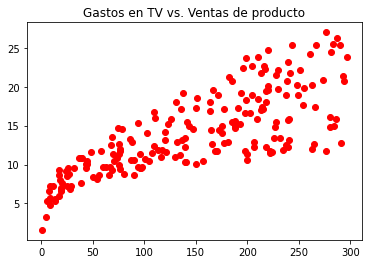

In [131]:
plt.plot(data_ads['TV'], data_ads['Sales'], 'ro', )
plt.title('Gastos en TV vs. Ventas de producto')

Text(0.5, 1.0, 'Gastos en Radio vs. Ventas de producto')

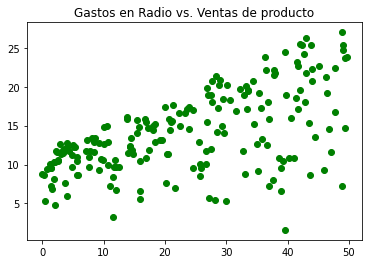

In [132]:
plt.plot(data_ads['Radio'], data_ads['Sales'], 'go', )
plt.title('Gastos en Radio vs. Ventas de producto')

Text(0.5, 1.0, 'Gastos en Newspaper vs. Ventas de producto')

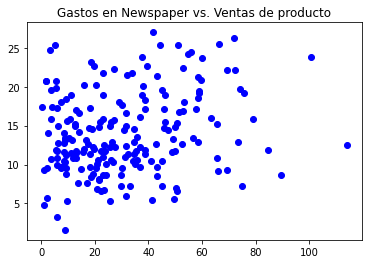

In [133]:
plt.plot(data_ads['Newspaper'], data_ads['Sales'], 'bo', )
plt.title('Gastos en Newspaper vs. Ventas de producto')

In [134]:
#finalmente, pandas ya tiene la matriz de correlación
data_ads_original.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


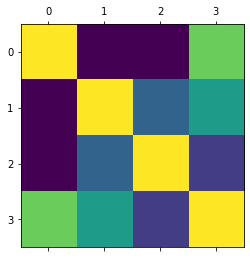

In [135]:
plt.matshow(data_ads_original.corr())